### **Stroke Prediction**

**Attribute Information**


*    id: unique identifier
*   gender: "Male", "Female" or "Other"


*   age: age of the patient

*    hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

*   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

*   ever_married: "No" or "Yes"

*   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*  bmi: body mass index


*   Residence_type: "Rural" or "Urban"


*  avg_glucose_level: average glucose level in blood


*   smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


*   stroke: 1 if the patient had a stroke or 0 if not





### **Importing Packages**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

### **Load & Read Data**

In [2]:
#Lets load the dataset and sample some
# loading the dataset to pandas dataframe
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
# Success
print("Stroke dataset has {} data points with {} variables each.".format(*data.shape))

Stroke dataset has 5110 data points with 12 variables each.


In [3]:
# let's see data
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### **Exploatroy Data Analysis & Visulazation**

In [4]:
#checking the number of rows and columns in dataframe 
print(data.shape)

(5110, 12)


In [5]:
#check missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# statistical measure of dataset
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Get information about DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


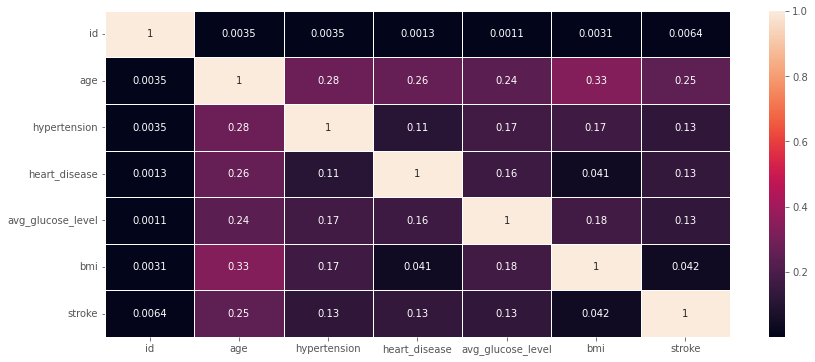

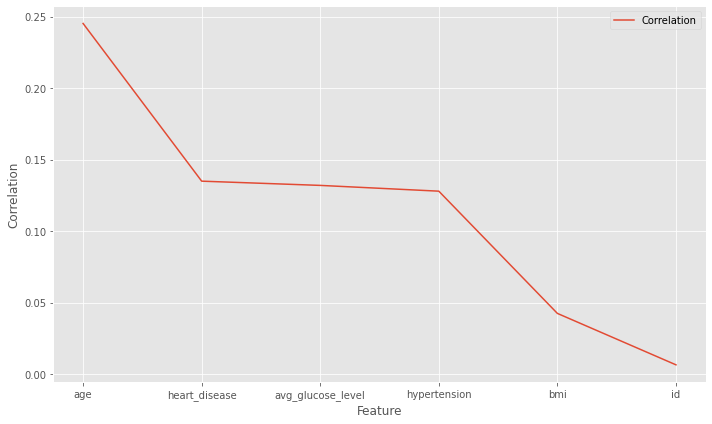

In [8]:
# check correlation
# Calculate correlation matrix and visualize as heatmap
plt.figure(figsize=(14,6))
corr=abs(data.corr())
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()
# Plot feature correlations with target variable
plt.figure(figsize=(10,6))
plt.plot(corr["stroke"].sort_values(ascending=False)[1:],label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Count Plot**



1.   Gender



Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


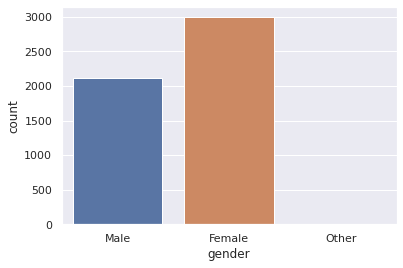

In [9]:
# Print the value counts for the 'gender' column in the 'data' dataframe
print(data.gender.value_counts())

# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'gender' column in the 'dataset' dataframe
ax = sns.countplot(data=data, x="gender")

# Show the plot
plt.show()



*  There is about 1000 diffrence between Female and Male in the data






2. Hypertension



0    4612
1     498
Name: hypertension, dtype: int64


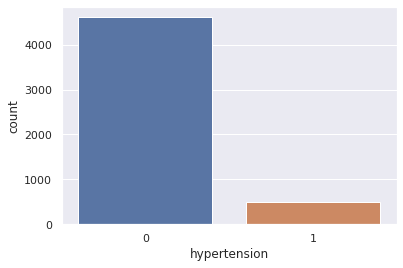

In [10]:
# Print the value counts for the 'hypertension' column in the 'data' dataframe
print(data.hypertension.value_counts())

# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'hypertension' column in the 'data' dataframe
ax = sns.countplot(data=data, x="hypertension")

# Show the plot
plt.show()



*   From above, it shows that less people are suffering from hypertension.






3.  Marriage Status



Yes    3353
No     1757
Name: ever_married, dtype: int64


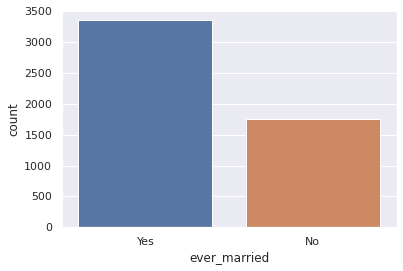

In [11]:
# Print the value counts for the 'ever_married' column in the 'data' dataframe
print(data.ever_married.value_counts())

# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'ever_married' column in the 'data' dataframe
ax = sns.countplot(data=data, x="ever_married")

# Show the plot
plt.show()



*  The ratio can seen from above is around 2:1 for being ever married.




4.   Work Type 



Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


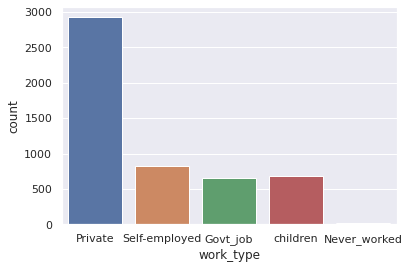

In [12]:
# Print the value counts for the 'work_type' column in the 'data' dataframe
print(data.work_type.value_counts())

# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'work_type' column in the 'data' dataframe
ax = sns.countplot(data=data, x="work_type")

# Show the plot
plt.show()



*   A lot of people works in Private sector.





5.   Residence Type 



Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


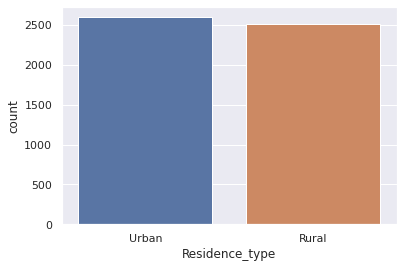

In [13]:
# Print the value counts for the 'Residence_type' column in the 'data' dataframe
print(data.Residence_type.value_counts())

# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'Residence_type' column in the 'data' dataframe
ax = sns.countplot(data=data, x="Residence_type")

# Show the plot
plt.show()



*   The residence type is same for people present in our dataset.





6.   Smoking Status 



never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


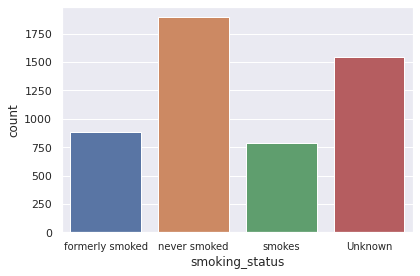

In [14]:
# Print the value counts for the 'smoking_status' column in the 'data' dataframe
print(data.smoking_status.value_counts())

# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'smoking_status' column in the 'data' dataframe
ax = sns.countplot(data=data, x="smoking_status")

# Set the x-axis tick labels font size to 10
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

# Set the layout tight and show the plot
plt.tight_layout()
plt.show()



*   A lot of people never smoked in their life.





7.   Stroke 



0    4861
1     249
Name: stroke, dtype: int64


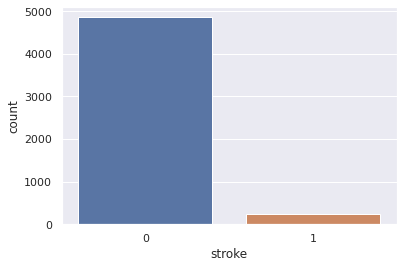

In [15]:
# Print the value counts for the 'stroke' column in the 'data' dataframe
print(data.stroke.value_counts())

# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'stroke' column in the 'data' dataframe
ax = sns.countplot(data=data, x="stroke")

# Show the plot
plt.show()



*   From above dependent variable, we have really less peoples who suffered stroke. But, this also means that our dataset is imbalance. We likely have to use sampling techniques to make the data balance



**Distribution Plot**

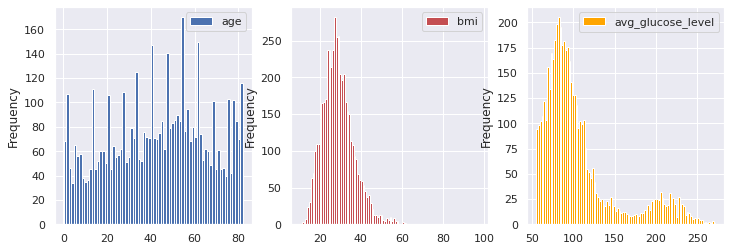

In [16]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot histogram for age on the first subplot
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0])

# Plot histogram for bmi on the second subplot
data.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[1])

# Plot histogram for avg_glucose_level on the third subplot
data.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[2])

# Display the plots
plt.show()




*  We have good distribution for age

*   I think we have outliers in bmi
*   Avg glucose distribution is reasonable because the normal avg of blood in sugar is less than 140 , that may be not good this feature will not be helpful to know if diabetes have correlation between diabetes and strokes







*   **No Stroke vs Stroke by BMI**



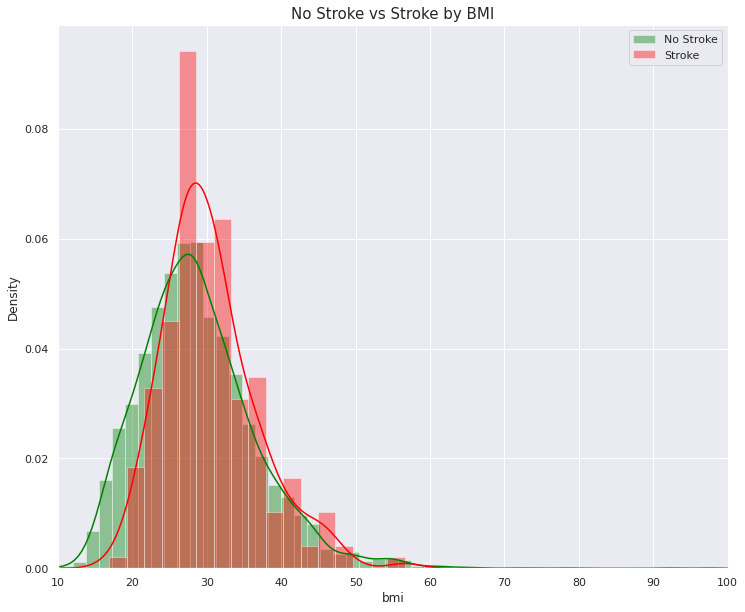

In [17]:
# Set the figure size
plt.figure(figsize=(12,10))

# Create a distribution plot using seaborn for the 'bmi' column in the 'data' dataframe, separated by stroke status
sns.distplot(data[data['stroke'] == 0]["bmi"], color='green', label='No Stroke')
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red', label='Stroke')

# Set the plot title, x-axis limit and show the plot
plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.legend()
plt.show()



*   overweight people who suffered a stroke is more.





*   **No Stroke vs Stroke by Age**



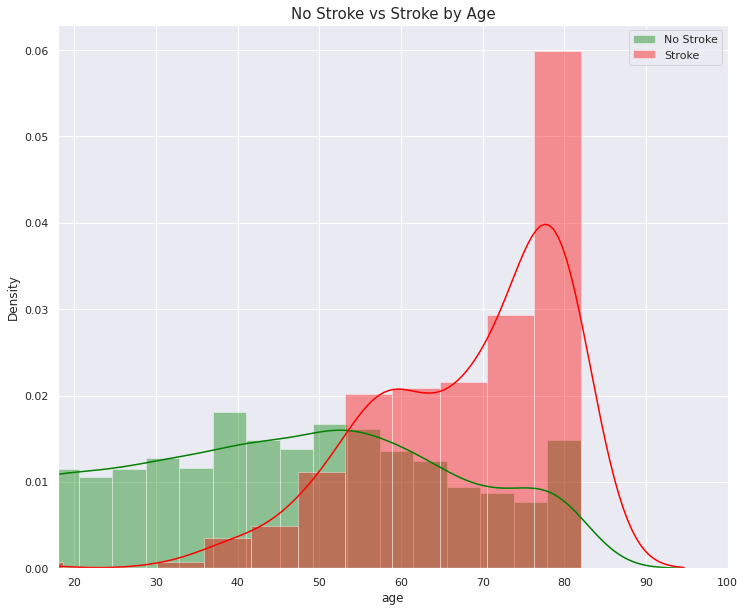

In [18]:
# Set the figure size
plt.figure(figsize=(12,10))

# Create a distribution plot using seaborn for the 'age' column in the 'data' dataframe, separated by stroke status
sns.distplot(data[data['stroke'] == 0]["age"], color='green', label='No Stroke')
sns.distplot(data[data['stroke'] == 1]["age"], color='red', label='Stroke')

# Set the plot title, x-axis limit and show the plot
plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.legend()
plt.show()



*    people having age above 50 suffered stroke more.



**Pie Chart**

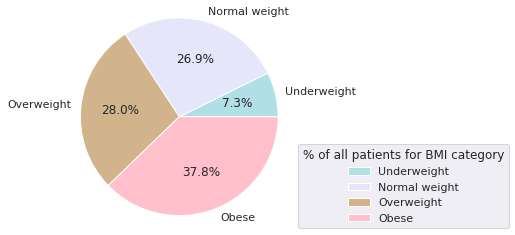

In [20]:
# create a list of bmi categories
bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

# create a list of values for each bmi category
values = [
    data[data['bmi'] <= 18.5]['stroke'].value_counts()[0], 
    data[(data['bmi'] <= 25) & (data['bmi'] > 18)]['stroke'].value_counts()[0], 
    data[(data['bmi'] <= 30) & (data['bmi'] > 25)]['stroke'].value_counts()[0], 
    data[data['bmi'] > 30]['stroke'].value_counts()[0]
]

# create a pie chart
fig, ax = plt.subplots()
ax.pie(x=values, labels=bmi_categories, pctdistance=0.6, radius=6, autopct='%1.1f%%', colors=['powderblue', 'lavender', 'tan', 'pink'])
ax.axis('equal')

# add a legend
legend = ax.legend(title='% of all patients for BMI category', loc=1, bbox_to_anchor=(1.5, 0.4))
plt.show()

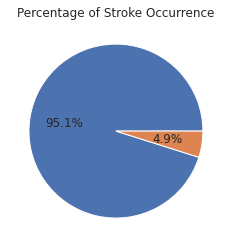

In [21]:
# calculate the percentage of each value in the 'stroke' column
value_counts = data['stroke'].value_counts()
percentages = round(value_counts / data.shape[0] * 100, 2)

# create a pie chart of the percentages
fig, ax = plt.subplots()
ax.pie(percentages, autopct='%1.1f%%')
ax.set(title='Percentage of Stroke Occurrence')
plt.show()

### **Data Preprocessing**

In [22]:
# Calculate the mean of the 'bmi' column in the 'data' dataframe
mean_bmi = data['bmi'].mean()

# Fill in missing values in the 'bmi' column with the mean value using the 'fillna' method
data['bmi'].fillna(value=mean_bmi, inplace=True)

# success
print(f'Number of missing values in "bmi" column: {data["bmi"].isnull().sum()}')

Number of missing values in "bmi" column: 0


In [23]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Define the list of numeric columns to scale
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# Scale the numeric columns in the 'data' dataframe using the 'fit_transform' method of the StandardScaler object
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [24]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['gender'])
data['Merried'] = label_encoder.fit_transform(data['ever_married'])
data['Employement'] = label_encoder.fit_transform(data['work_type'])
data['Residency'] = label_encoder.fit_transform(data['Residence_type'])
data['Smoker'] = label_encoder.fit_transform(data['smoking_status'])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,Merried,Employement,Residency,Smoker
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001234e+00,formerly smoked,1,1,1,2,1,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,4.615554e-16,never smoked,1,0,1,3,0,2
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,4.685773e-01,never smoked,1,1,1,2,0,2
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,7.154182e-01,smokes,1,0,1,2,1,3
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-6.357112e-01,never smoked,1,0,1,3,0,2


In [25]:
#  dropped unnecessary columns

data = data.drop(['gender','ever_married','work_type','Residence_type', 'smoking_status'], axis=1)
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex,Merried,Employement,Residency,Smoker
0,9046,1.051434,0,1,2.706375,1.001234e+00,1,1,1,2,1,1
1,51676,0.786070,0,0,2.121559,4.615554e-16,1,0,1,3,0,2
2,31112,1.626390,0,1,-0.005028,4.685773e-01,1,1,1,2,0,2
3,60182,0.255342,0,0,1.437358,7.154182e-01,1,0,1,2,1,3
4,1665,1.582163,1,0,1.501184,-6.357112e-01,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.626390,1,0,-0.494658,4.615554e-16,0,0,1,2,1,2
5106,44873,1.670617,0,0,0.420775,1.442949e+00,0,0,1,3,1,2
5107,19723,-0.363842,0,0,-0.511443,2.217363e-01,0,0,1,3,0,2
5108,37544,0.343796,0,0,1.328257,-4.278451e-01,0,1,1,2,0,1


In [26]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex,Merried,Employement,Residency,Smoker
count,5110.000000,5.110000e+03,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,5.005781e-17,0.097456,0.054012,1.001156e-16,2.224791e-17,0.048728,0.414286,0.656164,2.167710,0.508023,1.376908
std,21161.721625,1.000098e+00,0.296607,0.226063,1.000098e+00,1.000098e+00,0.215320,0.493044,0.475034,1.090293,0.499985,1.071534
min,67.000000,-1.908261e+00,0.000000,0.000000,-1.126958e+00,-2.415564e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,-8.061152e-01,0.000000,0.000000,-6.383223e-01,-6.616944e-01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,36932.000000,7.843218e-02,0.000000,0.000000,-3.149945e-01,-6.407951e-02,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000
75%,54682.000000,7.860701e-01,0.000000,0.000000,1.754080e-01,5.075521e-01,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000
max,72940.000000,1.714845e+00,1.000000,1.000000,3.657145e+00,8.926127e+00,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000


In [27]:
data.drop('id', axis=1, inplace=True)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex,Merried,Employement,Residency,Smoker
0,1.051434,0,1,2.706375,1.001234e+00,1,1,1,2,1,1
1,0.786070,0,0,2.121559,4.615554e-16,1,0,1,3,0,2
2,1.626390,0,1,-0.005028,4.685773e-01,1,1,1,2,0,2
3,0.255342,0,0,1.437358,7.154182e-01,1,0,1,2,1,3
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,4.615554e-16,0,0,1,2,1,2
5106,1.670617,0,0,0.420775,1.442949e+00,0,0,1,3,1,2
5107,-0.363842,0,0,-0.511443,2.217363e-01,0,0,1,3,0,2
5108,0.343796,0,0,1.328257,-4.278451e-01,0,1,1,2,0,1


In [28]:
data.shape

(5110, 11)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   Sex                5110 non-null   int64  
 7   Merried            5110 non-null   int64  
 8   Employement        5110 non-null   int64  
 9   Residency          5110 non-null   int64  
 10  Smoker             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


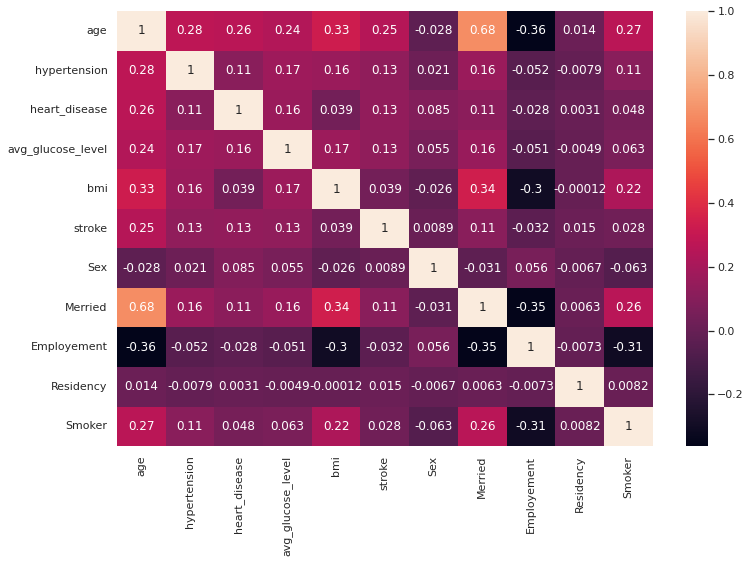

In [30]:
# Apply Corelation Matrix After preprocessing

plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

In [31]:
# Define a function that takes a dataset and a threshold value as inputs and returns the set of all names of correlated columns
def correlation(dataset, threshold):
    # Initialize an empty set to store the names of correlated columns
    col_corr = set()
    
    # Calculate the correlation matrix for the dataset using the 'corr' method
    corr_matrix = dataset.corr()
    
    # Iterate over the columns of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute value of the correlation coefficient is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # If it is, add the name of the column to the set of correlated columns
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    # Return the set of correlated column names
    return col_corr


In [32]:
corr_features = correlation(data, 0.35)


In [33]:
X_corr = data.drop(corr_features,axis=1)
X_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex,Residency,Smoker
0,1.051434,0,1,2.706375,1.001234e+00,1,1,1,1
1,0.786070,0,0,2.121559,4.615554e-16,1,0,0,2
2,1.626390,0,1,-0.005028,4.685773e-01,1,1,0,2
3,0.255342,0,0,1.437358,7.154182e-01,1,0,1,3
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,0,2
...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,4.615554e-16,0,0,1,2
5106,1.670617,0,0,0.420775,1.442949e+00,0,0,1,2
5107,-0.363842,0,0,-0.511443,2.217363e-01,0,0,0,2
5108,0.343796,0,0,1.328257,-4.278451e-01,0,1,0,1


### **Prediction**

**Splitting Data**

In [34]:
# drop the 'Stroke' column from the DataFrame to create the feature matrix
X = data.drop('stroke', axis=1)
# create the target vector
y = data['stroke'] 
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.3, stratify=y, random_state=42)
# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [35]:
# check shape
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (3577, 9)
x_test:  (1533, 9)
y_train:  (3577,)
y_test:  (1533,)


In [36]:
# make a balanced dataset by using SMOTE technique.

from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Logistic Regression**

In [37]:
# Apply Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [38]:
LR_score = LR.score(X_train_smote, y_train_smote)
LR_test = LR.score(X_test, y_test)

#testing model 

y_pred = LR.predict(X_test)

#evaluation

cm = confusion_matrix(y_test,y_pred)
print('Training Score',LR_score)
print('Testing Score ',LR_test)
print(cm)

Training Score 1.0
Testing Score  1.0
[[1458    0]
 [   0   75]]


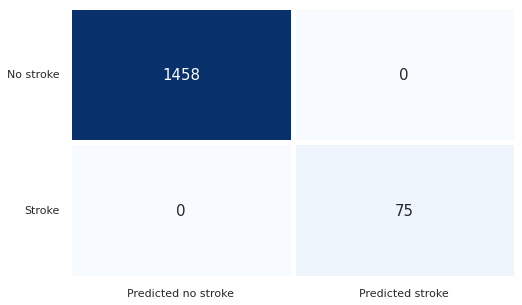

In [39]:
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()



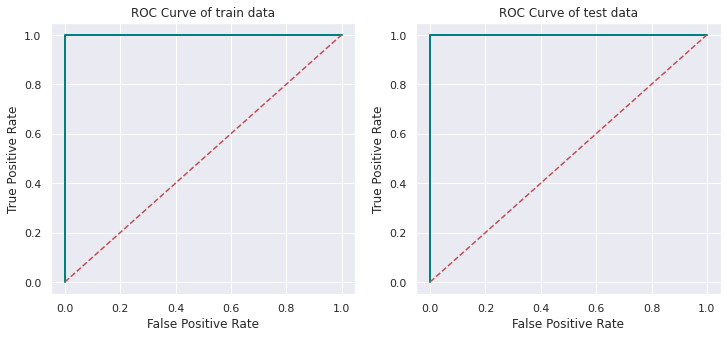

In [40]:
# predict probabilities for both train and test data
y_train_pred_prob = LR.predict_proba(X_train_smote)[:, 1]
y_test_pred_prob = LR.predict_proba(X_test)[:, 1]

# calculate ROC curve for train and test data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_smote, y_train_pred_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)

# create subplots to display ROC curves
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# plot ROC curve for train data
plt.sca(axes[0])
plt.plot(fpr_train, tpr_train, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plot ROC curve for test data
plt.sca(axes[1])
plt.plot(fpr_test, tpr_test, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the plot
plt.show()